# Analyzing Credit Default

#### * In this work I carried out a small analysis of credit loans from people who paid and did not pay the loan.

### Feature Name and Description
#### * person_age -> Age
#### * person_income -> Annual Income
#### * person_home_ownership -> Home ownership
#### * person_emp_length -> Employment length (in years)
#### * loan_intent -> Loan intent
#### * loan_grade -> Loan grade
#### * loan_amnt -> Loan amount
#### * loan_int_rate -> Interest rate
#### * loan_status -> Loan status (0 is non default 1 is default)
#### * loan_percent_income -> Percent income
#### * cb_person_default_on_file -> Historical default
#### * cb_preson_cred_hist_length -> Credit history length

### Importing Basic Libraries

In [6]:
# for numerical computing with Python
import numpy as np
# for data manipulation and analysis
import pandas as pd 

# for data visualization
import matplotlib.pyplot as plt 
# for advanced data visualization
import seaborn as sns 

# for machine learning in Python
from sklearn.model_selection import train_test_split, RandomizedSearchCV 
# for building a random forest classifier
from sklearn.ensemble import RandomForestClassifier 
# for building an XGBoost classifier
from xgboost import XGBClassifier 
# for building a CatBoost classifier
from catboost import CatBoostClassifier 

# for evaluating model performance
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 

### Load dataset

#### source: https://www.kaggle.com/datasets/laotse/credit-risk-dataset

In [9]:
# Load the credit risk dataset into a pandas DataFrame
data = pd.read_csv('credit_risk_dataset.csv')

# Print the first few rows of the DataFrame to ensure the data loaded correctly
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### Data Exploration

In [10]:
# Print the shape of the dataset to understand its size and structure
data.shape

(32581, 12)

In [11]:
# Generate descriptive statistics for the dataset, including all columns
data.describe(include='all')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


In [12]:
# Check the number of duplicated rows in the dataset
data.duplicated().sum()

165

In [13]:
# Remove duplicated rows from the dataset in place
data.drop_duplicates(inplace=True)

In [14]:
# Count the number of instances of each loan status in the dataset
data.value_counts('loan_status')

loan_status
0    25327
1     7089
dtype: int64

In [15]:
# Create a 2x4 subplot with a shared y-axis and set the figure size
numeric_cols = [col for col in data.columns if data[col].dtype != 'object']

In [16]:
numeric_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [17]:
if len(numeric_cols) % 2 == 1:
    num_rows = len(numeric_cols) // 2 + 1
else:
    num_rows = len(numeric_cols) // 2
num_cols = 2

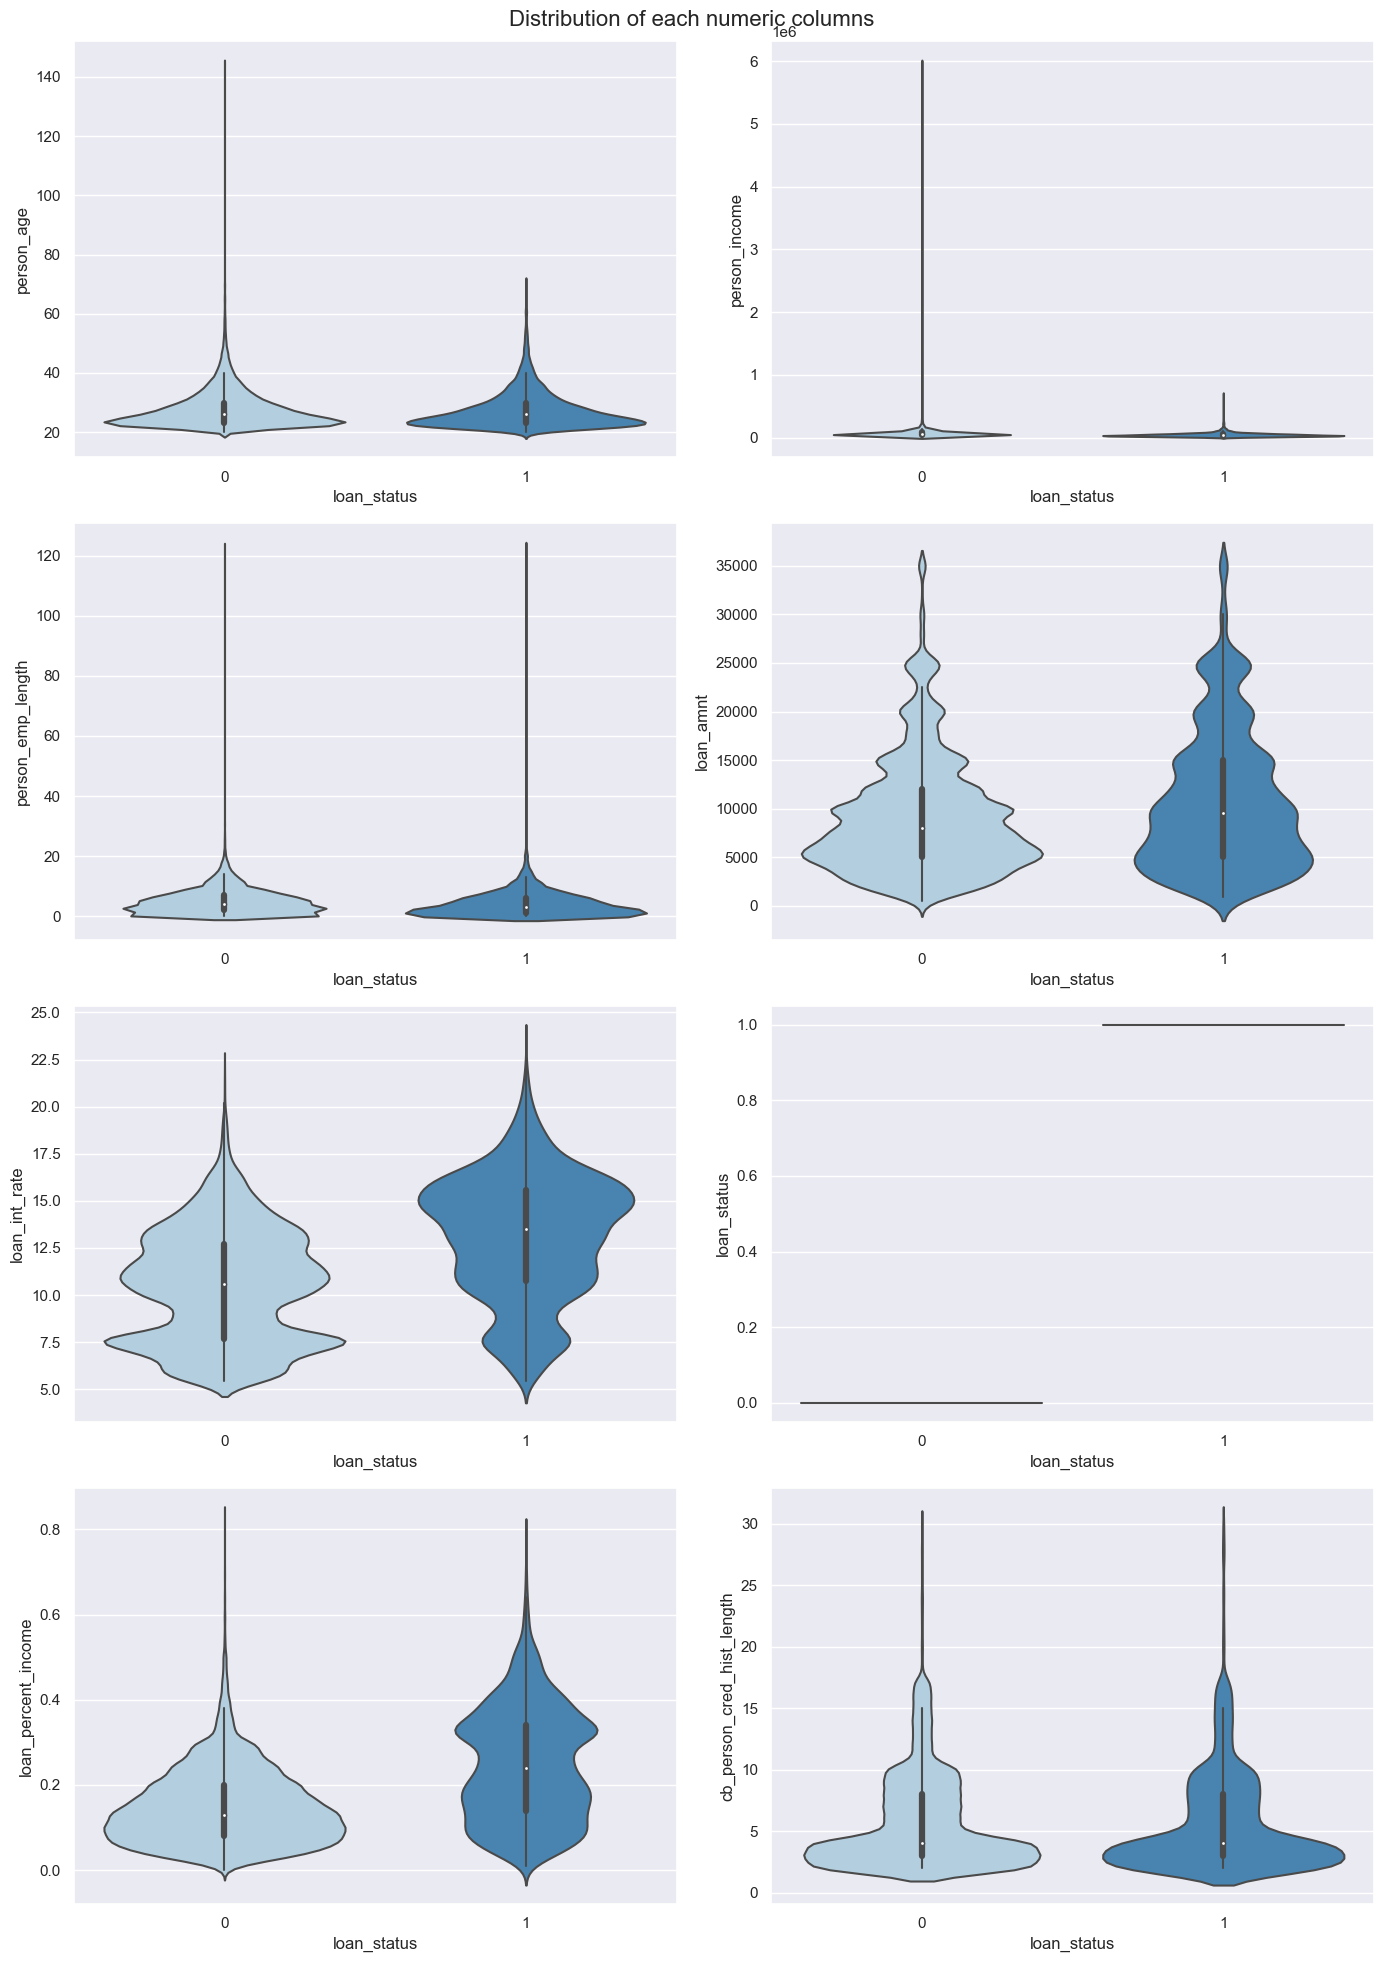

In [19]:
sns.set()

# Create a figure with the appropriate number of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(14, num_rows*5))

# Loop through the rows and columns of the subplots and create a scatter plot for each pair of features
for i in range(num_rows):
    for j in range(num_cols):
        pop_cols = numeric_cols.pop(0)
        ax = axes[i, j]
        sns.violinplot(dataset=data, x = data.loan_status, y= data[pop_cols], ax=ax, palette='Blues')

fig.suptitle('Distribution of each numeric columns', fontsize=16)

# Adjust the spacing between the plots
fig.tight_layout()

# Show the plot
plt.show()

#### Insights by this violinplots: 
 High interest rate and high Percent of income increases default clients number.

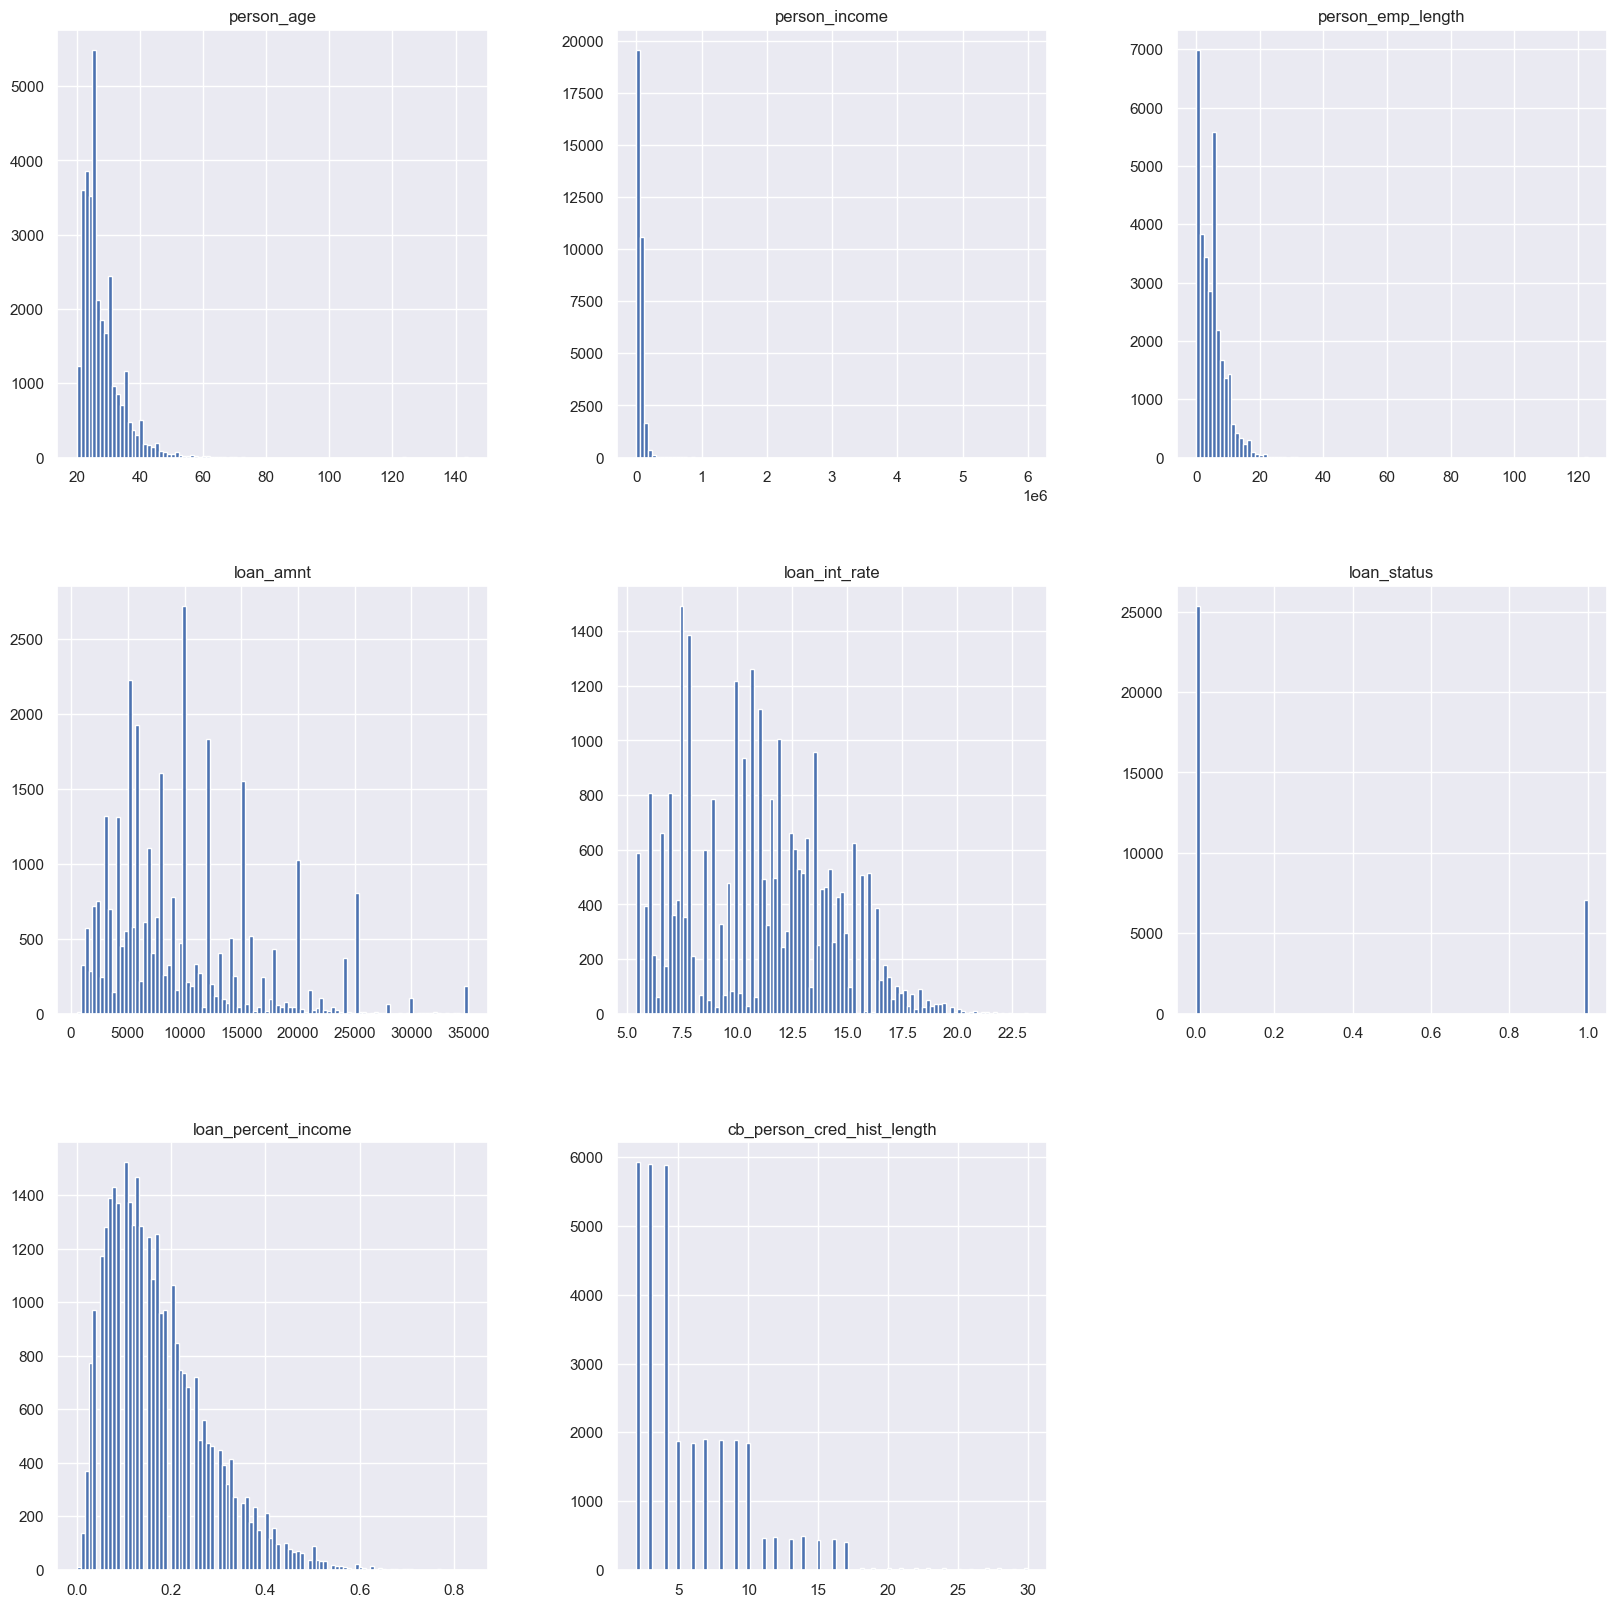

In [20]:
# Generate histograms of the dataset's
data.hist(figsize=(20, 20), bins=100)

# Show the plot
plt.show()

#### Insights by this histograms:
We have some outliers and not real values.

In [21]:
# Count the number of instances of each age in the 'person_age' column, sort the results in descending order, and show the top 5
data.person_age.value_counts().sort_index(ascending=False).head()

144    3
123    2
94     1
84     1
80     1
Name: person_age, dtype: int64

In [22]:
data = data[data.person_age <= 100]

In [23]:
data[data.person_emp_length >= data.person_age]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [24]:
data = data[data.person_emp_length < data.person_age]

#### I think Person Income columns has some outliers that is why i drop 1% of top incomes

In [25]:
q = data.person_income.quantile(0.99)
data = data[data.person_income < q]

In [26]:
# Print a summary of the dataset's columns and their data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31205 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  31205 non-null  int64  
 1   person_income               31205 non-null  int64  
 2   person_home_ownership       31205 non-null  object 
 3   person_emp_length           31205 non-null  float64
 4   loan_intent                 31205 non-null  object 
 5   loan_grade                  31205 non-null  object 
 6   loan_amnt                   31205 non-null  int64  
 7   loan_int_rate               28200 non-null  float64
 8   loan_status                 31205 non-null  int64  
 9   loan_percent_income         31205 non-null  float64
 10  cb_person_default_on_file   31205 non-null  object 
 11  cb_person_cred_hist_length  31205 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.1+ MB


In [27]:
# Count the number of missing values in each column of the dataset
data.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3005
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [28]:
# Group the rows in the dataset by 'loan_status', count the number of missing values
# in the 'loan_int_rate' column for each group, and show the results
data.isna().groupby('loan_status').sum()[['loan_int_rate']]


,loan_int_rate
loan_status,
False,3005


In [29]:
# Calculate the mean of the 'loan_int_rate' column and use it to fill
# in any missing values in that column
m = np.mean(data.loan_int_rate)
data.fillna(round(m, 2), inplace=True)
data


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [30]:
# Count the number of missing values in each column of the dataset
# (after filling in missing values in the 'loan_int_rate' column)
data.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

#### Now we dont have any nan values.

In [31]:
def barplot_categorical_columns(data):
    
    # Get a list of categorical columns
    cat_cols = [col for col in data.columns if data[col].dtype == 'object']

    # Create a bar plot for each categorical column
    for col in cat_cols:
        plt.figure(figsize=(12,5))
        sns.barplot(x = data[col].value_counts().index,
                    y = data[col].value_counts().values,
                    palette = 'Blues')
        plt.title(f'Values for each category {col} column', 
                  fontdict={'fontsize' : 14})
        plt.xlabel('Category', fontdict={'fontsize' : 12})
        plt.ylabel('Count', fontdict={'fontsize' : 12})
        plt.show()

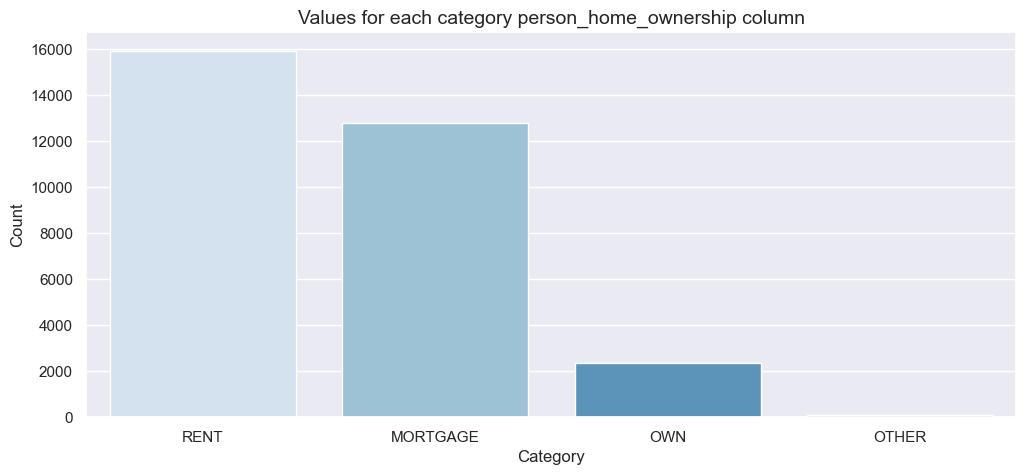

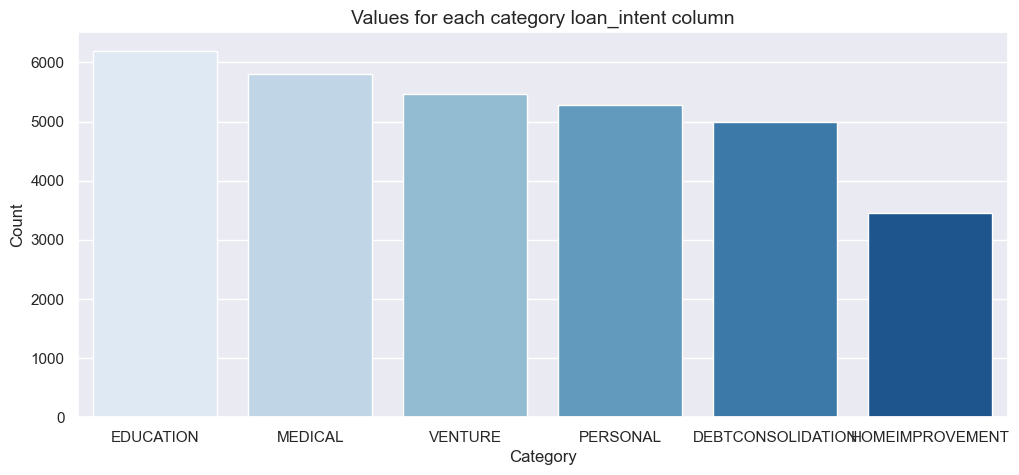

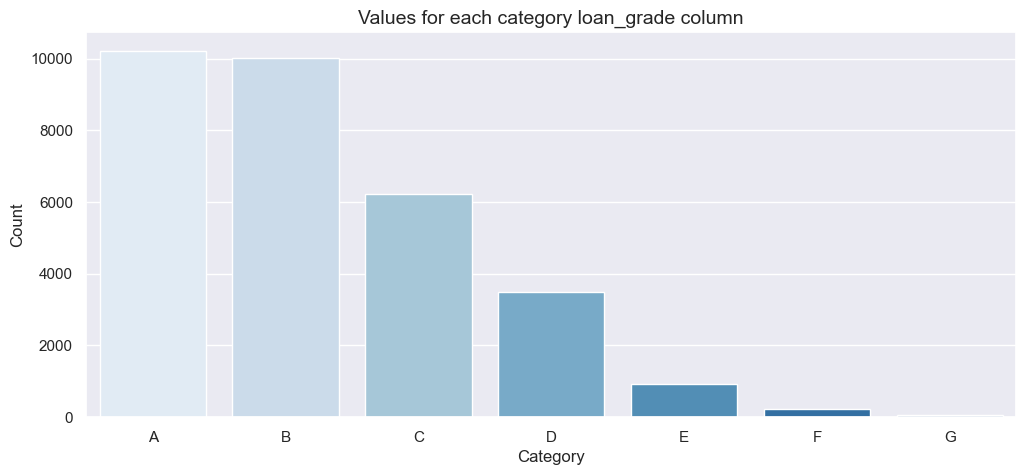

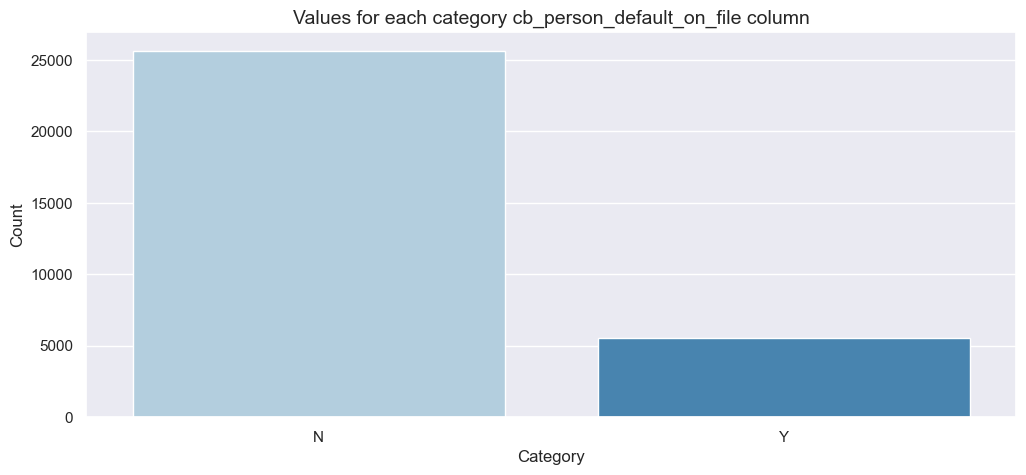

In [32]:
barplot_categorical_columns(data)

In [33]:
# Map the letter grades in the 'loan_grade' column to numerical values
data['loan_grade'] = data['loan_grade'].map({'A' : 6, 'B' : 5, 'C' : 4,
                                             'D' : 3, 'E' : 2, 'F' : 1, 'G' : 0})

In [34]:
# Split the dataset into features (X) and target variable (y)
X = data.drop('loan_status', axis=1)
y = data.loan_status

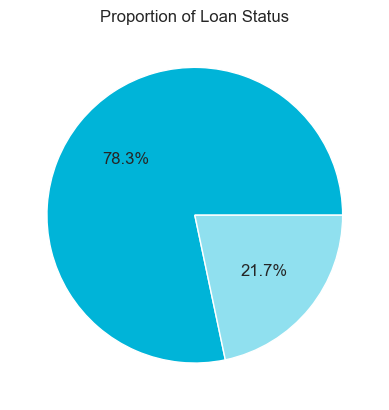

In [35]:
# Create a pie chart showing the proportion of each loan status in the dataset
plt.pie(data['loan_status'].value_counts(), autopct='%1.1f%%', colors= ['#00b4d8', '#90e0ef'])

# Set the title of the chart
plt.title('Proportion of Loan Status')

# Show the chart
plt.show()

In [36]:
# Create dummy variables for the categorical features
X_dum = pd.get_dummies(X)

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dum, y,
                                                    test_size= 0.2,
                                                    stratify= y, 
                                                    random_state=73)

In [38]:
# Calculate the proportion of each class in the target variable
y.value_counts(normalize=True)

0    0.783112
1    0.216888
Name: loan_status, dtype: float64

In [39]:
# Calculate the proportion of each class in the training set target variable
y_train.value_counts(normalize=True)

0    0.783128
1    0.216872
Name: loan_status, dtype: float64

### Model implementation

> ### RandomForest

In [ ]:
rfc = RandomForestClassifier(random_state=73)

# define the parameter distribution to search
param_dist = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [5, 10, 20],
    "min_samples_split": [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4], 
    'max_features': ['auto', 'sqrt', 'log2']
}

# create a randomized search object
random_search_rfc = RandomizedSearchCV(rfc, param_dist, cv=5, n_iter=50, random_state=73, verbose=2)

# fit the randomized search object to the data
random_search_rfc.fit(X_train, y_train)

# print the best parameters and score
print("Best parameters:", random_search_rfc.best_params_)
print("Best score:", random_search_rfc.best_score_)

In [41]:
# Generate the classification report for the Random Forest Classifier model
pred_rfc = random_search_rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4887
           1       0.98      0.74      0.84      1354

    accuracy                           0.94      6241
   macro avg       0.95      0.87      0.90      6241
weighted avg       0.94      0.94      0.94      6241



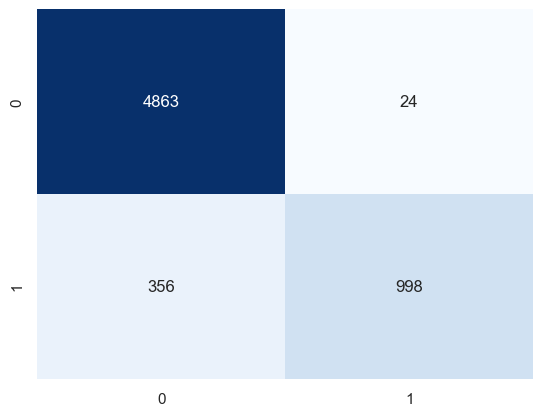

In [42]:
# Plot the confusion matrix heatmap for the Random Forest Classifier model
sns.heatmap(confusion_matrix(y_test, pred_rfc), annot=True, cbar= False, fmt= '.0f', cmap='Blues')

plt.show()

> ### XGBoost

In [ ]:
# Define the hyperparameter search space
param_dist = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 500],
    'subsample': [0.5, 0.8, 1.0]
}

# Create an XGBoost classifier
xgb = XGBClassifier(random_state=73)

# Create a randomized search object
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    random_state=73,
    verbose = 2
)

# Fit the randomized search object to the data
random_search_xgb.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", random_search_xgb.best_params_)
print("Best score:", random_search_xgb.best_score_)

In [44]:
# Generate the classification report for the XGBoost Classifier model
pred_xgb = random_search_xgb.predict(X_test)
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      4887
           1       0.96      0.76      0.85      1354

    accuracy                           0.94      6241
   macro avg       0.95      0.88      0.91      6241
weighted avg       0.94      0.94      0.94      6241



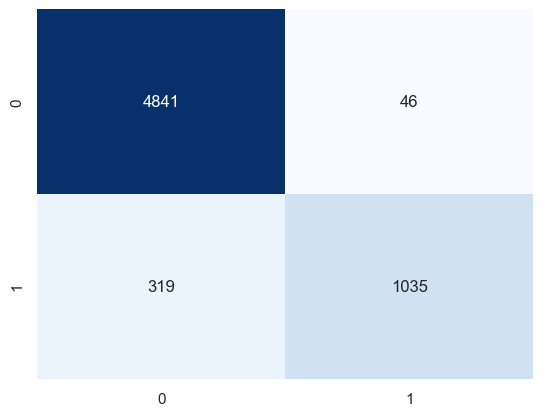

In [45]:
# Plot the confusion matrix heatmap for the XGBoost Classifier model
sns.heatmap(confusion_matrix(y_test, pred_xgb), annot=True, cbar= False, fmt= '.0f', cmap='Blues')

plt.show()

> ### CatBoost

In [ ]:
# Define the CatBoost classifier
catboost = CatBoostClassifier()

# Define the hyperparameter space to search
param_dist = {
    'learning_rate': [0.1, 0.5, 0.9],
    'depth': [3, 6, 9],
    'l2_leaf_reg': [1, 5, 10],
    'bagging_temperature': [0.0, 0.5, 1.0],
    'random_strength': [0.0, 0.5, 1.0]
}

# Define the RandomizedSearchCV object
random_search_cbc = RandomizedSearchCV(
    catboost, 
    param_distributions=param_dist, 
    n_iter=10,
    cv=5,
    random_state=73,
    verbose = 0)

# Fit the RandomizedSearchCV object to the training data
random_search_cbc.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding score
print("Best Hyperparameters:", random_search_cbc.best_params_)
print("Best Score:", random_search_cbc.best_score_)


In [47]:
# Generate the classification report for the CatBoost Classifier model
pred_cbc = random_search_cbc.predict(X_test)
print(classification_report(y_test, pred_cbc))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      4887
           1       0.97      0.76      0.85      1354

    accuracy                           0.94      6241
   macro avg       0.95      0.88      0.91      6241
weighted avg       0.94      0.94      0.94      6241



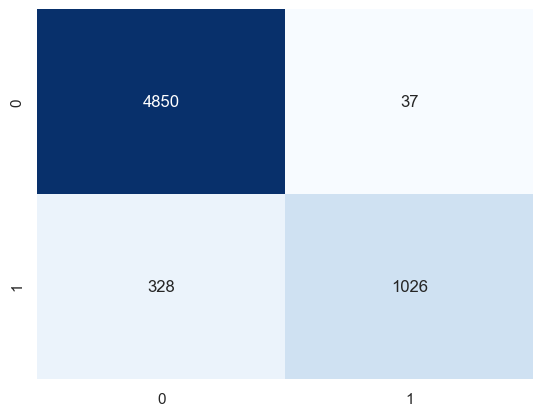

In [48]:
# Plot the confusion matrix heatmap for the CatBoost Classifier model
sns.heatmap(confusion_matrix(y_test, pred_cbc), annot=True, cbar= False, fmt= '.0f', cmap='Blues')

plt.show()

### Algorithm Evaluation

In [49]:
print(f'RandomForestClassifier:  {round(accuracy_score(y_test, pred_rfc) * 100, 2)}')
print(f'XGBoostClassifier: {round(accuracy_score(y_test, pred_xgb) * 100, 2)}')
print(f'CatBoostClassifier: {round(accuracy_score(y_test, pred_cbc) * 100, 2)}')

RandomForestClassifier:  93.91
XGBoostClassifier: 94.15
CatBoostClassifier: 94.15


### Finaly XGBoost Classifier shows more effective accuracy 94.15% and f1-score for did not pay the loan 85%. We can get higher accuracy by tuning models or get more information about clients. One think really increase accuracy it is drop null values it helps to analize correct classification.

### * For comments used ChatGPT